In [1]:
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%load_ext autoreload
%autoreload 2
from ID3 import *

In [3]:
train_orig = load_data_and_label('titanic-train')
test_orig = load_data_and_label('titanic-test')

# Just to make sure that your data matches mine

In [4]:
train_orig.describe()

,Pclass,Sex,Age,Fare,Embarked,relatives,IsAlone,Label
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,2.321027,0.356340,29.476726,32.906902,7.219904,0.882825,0.611557,0.391653
std,0.831257,0.479302,12.747827,54.358028,22.165226,1.643679,0.487788,0.488512
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,14.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,35.000000,30.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,1.000000,80.000000,512.000000,77.000000,10.000000,1.000000,1.000000


In [5]:
test_orig.describe()

,Pclass,Sex,Age,Fare,Embarked,relatives,IsAlone,Label
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,2.279851,0.343284,29.041045,29.179104,5.966418,0.955224,0.582090,0.365672
std,0.848023,0.475694,13.677471,36.628687,20.214088,1.542728,0.494138,0.482519
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.750000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,15.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,35.000000,31.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,1.000000,74.000000,247.000000,77.000000,7.000000,1.000000,1.000000


# Question 1

In [6]:
np.random.seed(0)  # just in case

training_sizes = [40, 60, 80, 90]

train_acc = []
test_acc = []
node_number = []

for size in tqdm(training_sizes):
    train, _ = split_dataframe(train_orig, size/100)
    print('-' * 50)
    print("Size:", size)
    print("Mean:")
    print(train.mean())

    model = DecisionTreeClassifier(criterion='entropy', random_state=0)
    model.fit(train.drop('Label', axis=1), train['Label'])

    train_acc.append(model.score(train.drop('Label', axis=1), train['Label']))
    test_acc.append(model.score(test_orig.drop('Label', axis=1), test_orig['Label']))
    node_number.append(model.tree_.node_count)

100%|██████████| 4/4 [00:00<00:00, 85.78it/s]

--------------------------------------------------
Size: 40
Mean:
Pclass        2.349398
Sex           0.345382
Age          29.341365
Fare         32.542169
Embarked      6.361446
relatives     0.871486
IsAlone       0.626506
Label         0.341365
dtype: float64
--------------------------------------------------
Size: 60
Mean:
Pclass        2.337802
Sex           0.340483
Age          29.589812
Fare         30.903485
Embarked      6.772118
relatives     0.804290
IsAlone       0.632708
Label         0.361930
dtype: float64
--------------------------------------------------
Size: 80
Mean:
Pclass        2.333333
Sex           0.345382
Age          29.208835
Fare         31.947791
Embarked      6.652610
relatives     0.851406
IsAlone       0.622490
Label         0.375502
dtype: float64
--------------------------------------------------
Size: 90
Mean:
Pclass        2.312500
Sex           0.344643
Age          29.496429
Fare         32.237500
Embarked      6.769643
relatives     0.860714
I

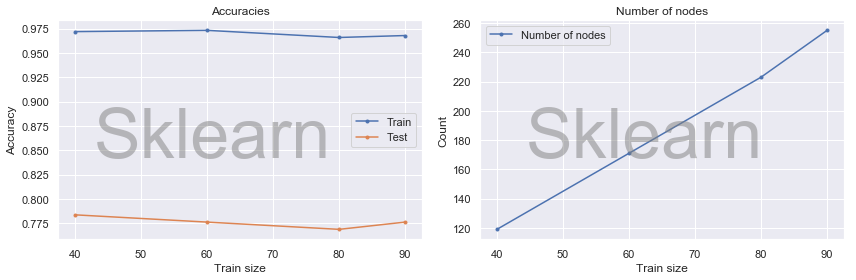

In [8]:
train_acc

[0.9718875502008032,
 0.9731903485254692,
 0.9658634538152611,
 0.9678571428571429]

In [9]:
test_acc

[0.7835820895522388,
 0.7761194029850746,
 0.7686567164179104,
 0.7761194029850746]

In [10]:
node_number

[119, 171, 223, 255]

# Question 2

In [11]:
_, validation = split_dataframe(train_orig, 1 - 20/100)
validation.describe()

,Pclass,Sex,Age,Fare,Embarked,relatives,IsAlone,Label
count,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000
mean,2.272000,0.400000,30.544000,36.72800,9.480000,1.008000,0.568000,0.456000
std,0.846015,0.491869,14.417454,61.76221,25.037263,1.766608,0.497348,0.500065
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,24.000000,8.00000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,28.000000,15.00000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,35.000000,34.00000,1.000000,1.000000,1.000000,1.000000
max,3.000000,1.000000,80.000000,512.00000,77.000000,10.000000,1.000000,1.000000


In [12]:
training_sizes = [40, 50, 60, 70, 80]
depths = [5, 10, 15, 20]

train_acc = []
test_acc = []
node_number = []
optimal_depth = []

for size in tqdm(training_sizes):
    best_val_accuracy = None

    best_depth = None
    test_accuracy = None
    train_accuracy = None
    node_count = None

    train, _ = split_dataframe(train_orig, size/100)
    
    print('-' * 50)
    print("Size:", size)
    print("Mean:")
    print(train.mean())

    for depth in depths:
        model = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=depth)
        model.fit(train.drop('Label', axis=1), train['Label'])

        new_val_accuracy = model.score(validation.drop('Label', axis=1), validation['Label'])
        
        print("Accuracy:", new_val_accuracy, "Depth:", depth, "Nodes:", model.tree_.node_count)
        
        if not best_val_accuracy or best_val_accuracy < new_val_accuracy:
            best_val_accuracy = new_val_accuracy
            best_depth = depth

            test_accuracy = model.score(test_orig.drop('Label', axis=1), test_orig['Label'])
            train_accuracy = model.score(train.drop('Label', axis=1), train['Label'])
            node_count = model.tree_.node_count

    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    node_number.append(node_count)
    optimal_depth.append(best_depth)

100%|██████████| 5/5 [00:00<00:00, 41.51it/s]

--------------------------------------------------
Size: 40
Mean:
Pclass        2.349398
Sex           0.345382
Age          29.341365
Fare         32.542169
Embarked      6.361446
relatives     0.871486
IsAlone       0.626506
Label         0.341365
dtype: float64
Accuracy: 0.792 Depth: 5 Nodes: 31
Accuracy: 0.776 Depth: 10 Nodes: 89
Accuracy: 0.768 Depth: 15 Nodes: 117
Accuracy: 0.768 Depth: 20 Nodes: 119
--------------------------------------------------
Size: 50
Mean:
Pclass        2.347267
Sex           0.340836
Age          29.331190
Fare         32.170418
Embarked      6.360129
relatives     0.864952
IsAlone       0.617363
Label         0.356913
dtype: float64
Accuracy: 0.824 Depth: 5 Nodes: 35
Accuracy: 0.784 Depth: 10 Nodes: 101
Accuracy: 0.76 Depth: 15 Nodes: 149
Accuracy: 0.752 Depth: 20 Nodes: 153
--------------------------------------------------
Size: 60
Mean:
Pclass        2.337802
Sex           0.340483
Age          29.589812
Fare         30.903485
Embarked      6.772118

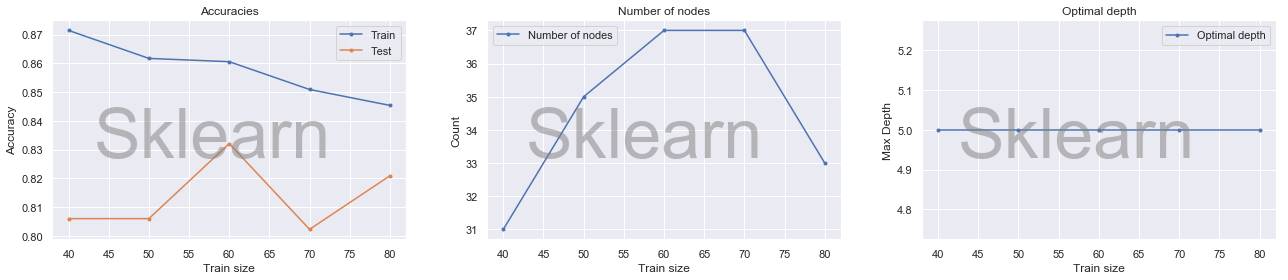

In [14]:
train_acc

[0.8714859437751004,
 0.8617363344051447,
 0.8605898123324397,
 0.8509174311926605,
 0.8453815261044176]

In [15]:
test_acc

[0.8059701492537313,
 0.8059701492537313,
 0.832089552238806,
 0.8022388059701493,
 0.8208955223880597]

In [16]:
node_number

[31, 35, 37, 37, 33]

In [17]:
optimal_depth

[5, 5, 5, 5, 5]